In [128]:
# Packages load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import norm
from sklearn.feature_selection import RFECV

In [129]:
# load of dataset as a pandas dataframe
dtCancer = load_breast_cancer(as_frame=True)

In [130]:
# split of test and train sets
x = dtCancer.data
y = dtCancer.target


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

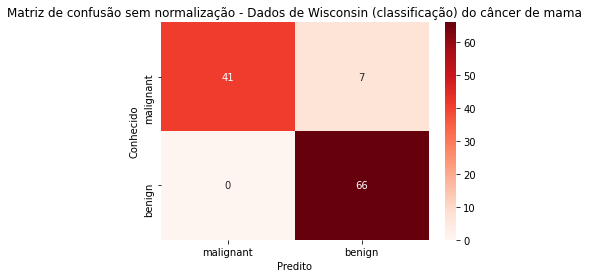


TP  = 41.00
TN  = 66.00
FN  = 7.00
FP  = 0.00

Acurácia                  (TP+TN)/n    = 0.93860 ou 93.86%
Precisão                  TP/(TP+FP)   = 1.00000 ou 100.00%
Sensibilidade (recall)    TP/(TP+FN)   = 0.85417 ou 85.42%

__________________________________________________________



In [139]:
# generate prelimonary model
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

cmI = confusion_matrix(y_test, y_predict, normalize=None)
plt.title('Matriz de confusão sem normalização - Dados de Wisconsin (classificação) do câncer de mama')

ax = sns.heatmap(cmI, annot = True, cmap=plt.cm.Reds) 
ax.set_ylim (2.0, 0)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.xlabel('Predito')
plt.ylabel('Conhecido')
plt.show()

tp = cmI[0][0]
tn = cmI[1][1]

fn = cmI[0][1]
fp = cmI[1][0]
n  = tp + tn + fn + fp

recall = tp/(tp + fn)   
precision = tp / (tp + fp)  
accuracy = (tp + tn)/n      

print("") 
print("TP  = {:.2f}".format(tp))
print("TN  = {:.2f}".format(tn))
print("FN  = {:.2f}".format(fn))
print("FP  = {:.2f}".format(fp))

print("") 
print("Acurácia                  (TP+TN)/n    = {:.5f}".format(accuracy) + " ou {:.2f}%".format(accuracy*100))
print("Precisão                  TP/(TP+FP)   = {:.5f}".format(precision)+ " ou {:.2f}%".format(precision*100))
print("Sensibilidade (recall)    TP/(TP+FN)   = {:.5f}".format(recall)+ " ou {:.2f}%".format(recall*100))

print("") 
print("__________________________________________________________")
print("")  



<ipython-input-132-690098283ddc>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


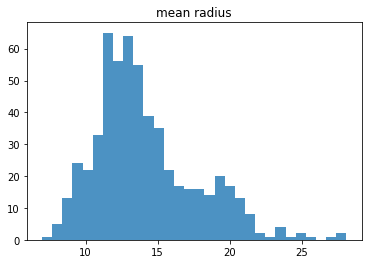

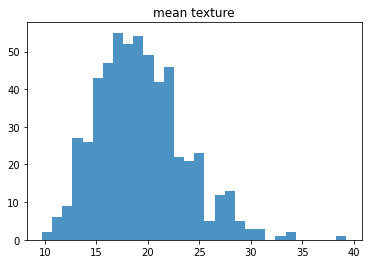

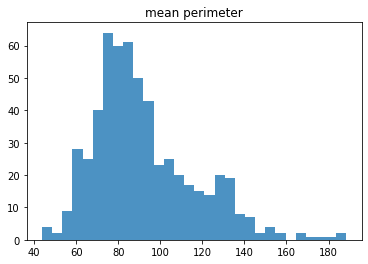

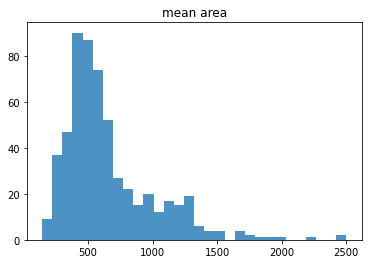

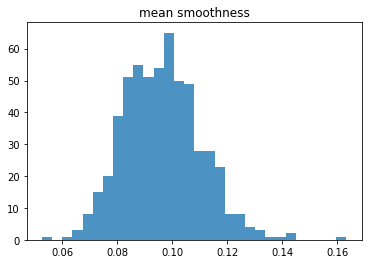

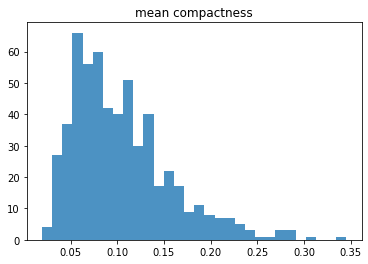

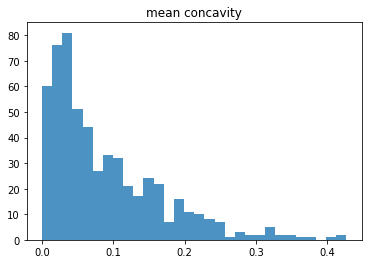

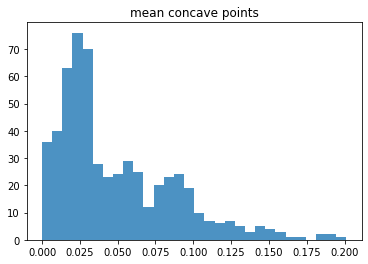

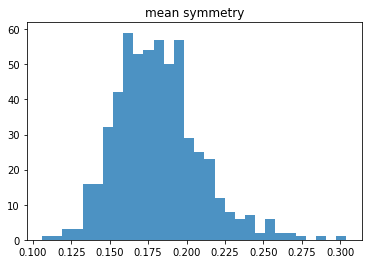

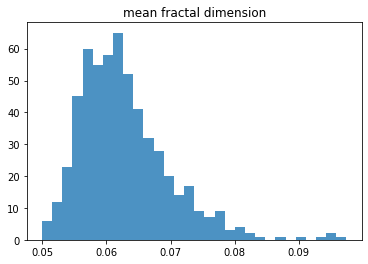

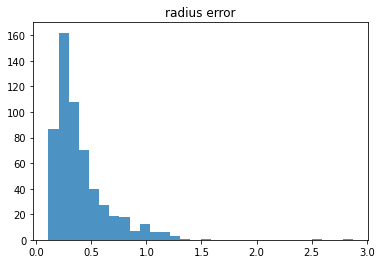

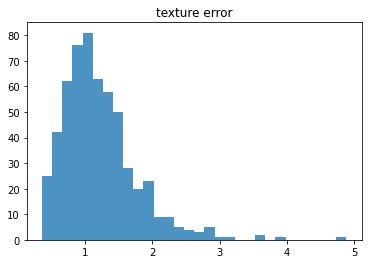

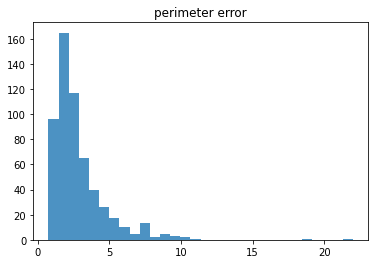

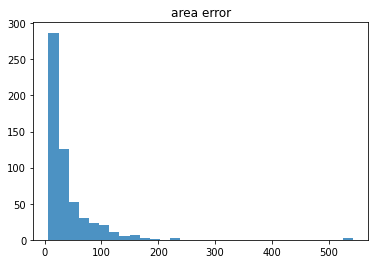

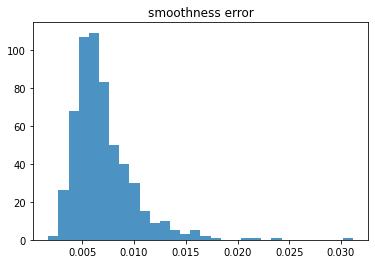

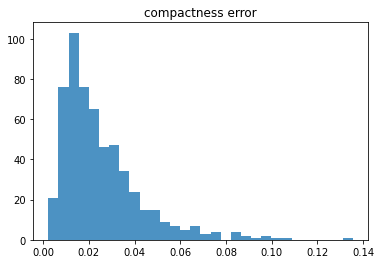

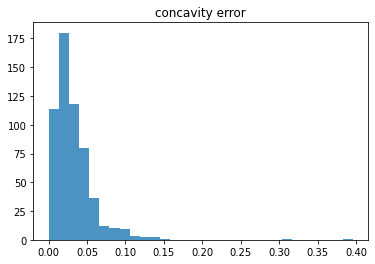

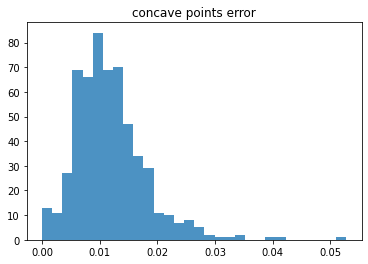

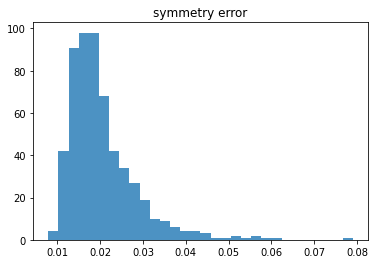

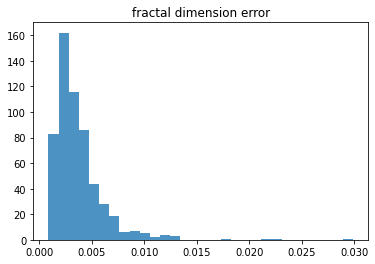

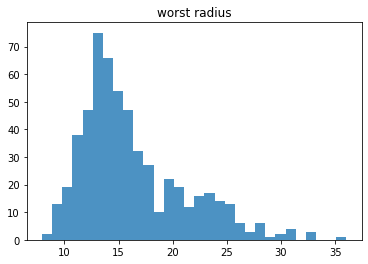

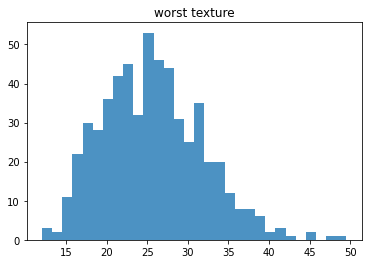

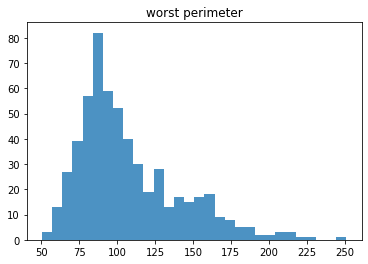

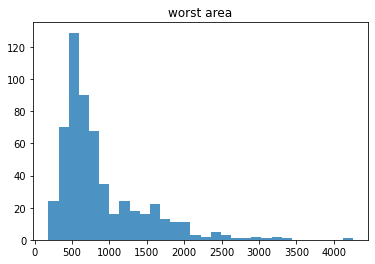

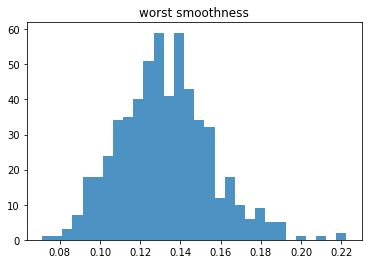

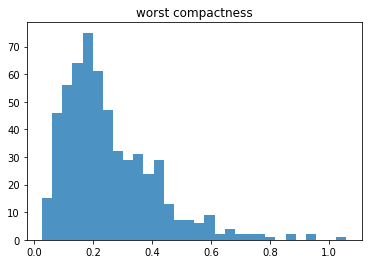

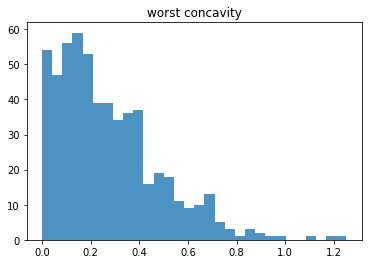

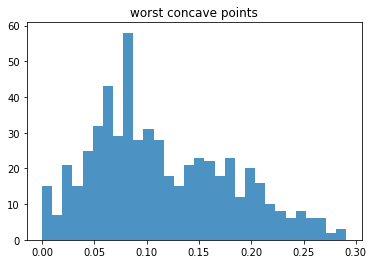

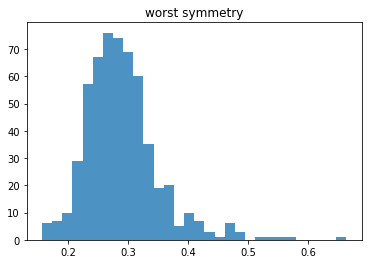

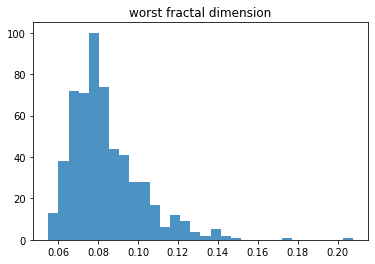

In [132]:
# distribution analysis of atributes
for atr in dtCancer.feature_names:
    plt.figure()
    plt.hist(x[atr], bins=30, alpha = 0.8)
    plt.title(atr)




In [133]:
# Normalize the atributes
x_min = x.min()
df_range = x.max() - x_min
x_scaled = (x - x_min)/ df_range


In [134]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.20, random_state=5)

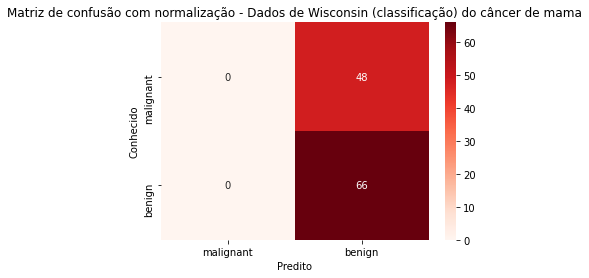


TP  = 0.00
TN  = 66.00
FN  = 48.00
FP  = 0.00

Acurácia                  (TP+TN)/n    = 0.57895 ou 57.89%
Precisão                  TP/(TP+FP)   = nan ou nan%
Sensibilidade (recall)    TP/(TP+FN)   = 0.00000 ou 0.00%

__________________________________________________________



<ipython-input-140-e87679511bae>:26: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [140]:
# generate prelimonary model
svc_model_scaled = SVC()
svc_model_scaled.fit(X_train_scaled, y_train_scaled)
y_predict = svc_model.predict(X_test_scaled)

cmI = confusion_matrix(y_test_scaled, y_predict, normalize=None)
plt.title('Matriz de confusão com normalização - Dados de Wisconsin (classificação) do câncer de mama')

ax = sns.heatmap(cmI, annot = True, cmap=plt.cm.Reds) 
ax.set_ylim (2.0, 0)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.xlabel('Predito')
plt.ylabel('Conhecido')
plt.show()

tp = cmI[0][0]
tn = cmI[1][1]

fn = cmI[0][1]
fp = cmI[1][0]
n  = tp + tn + fn + fp

recall = tp/(tp + fn)   
precision = tp / (tp + fp)  
accuracy = (tp + tn)/n      

print("") 
print("TP  = {:.2f}".format(tp))
print("TN  = {:.2f}".format(tn))
print("FN  = {:.2f}".format(fn))
print("FP  = {:.2f}".format(fp))

print("") 
print("Acurácia                  (TP+TN)/n    = {:.5f}".format(accuracy) + " ou {:.2f}%".format(accuracy*100))
print("Precisão                  TP/(TP+FP)   = {:.5f}".format(precision)+ " ou {:.2f}%".format(precision*100))
print("Sensibilidade (recall)    TP/(TP+FN)   = {:.5f}".format(recall)+ " ou {:.2f}%".format(recall*100))

print("") 
print("__________________________________________________________")
print("")  



In [136]:
# select more important attributs for smaller models
model = RFECV(svc_model, step = 1, cv = 10)
model.fit(X_train_scaled, y_train_scaled)
model.support_


ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.